# loading libaries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# --- Cleaning for Credit Risk Dataset ---
# Load data
df_credit_risk = pd.read_csv('credit_risk.csv')
df_credit_risk = remove_outliers(df_credit_risk)
# Function to remove outliers
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number])
    mean = numeric_cols.mean()
    std = numeric_cols.std()
    is_outlier = (np.abs(numeric_cols - mean) > 3 * std).any(axis=1)
    return df[~is_outlier]

# Remove outliers
df_credit_risk = remove_outliers(df_credit_risk)

# Display numerical statistics
print("Mean of the dataframe:\n", df_credit_risk.mean())
print("\nStandard Deviation of the dataframe:\n", df_credit_risk.std())
# Show first 10 instances
print("df_credit_risk first 10 instances:\n", df_credit_risk.head(10))



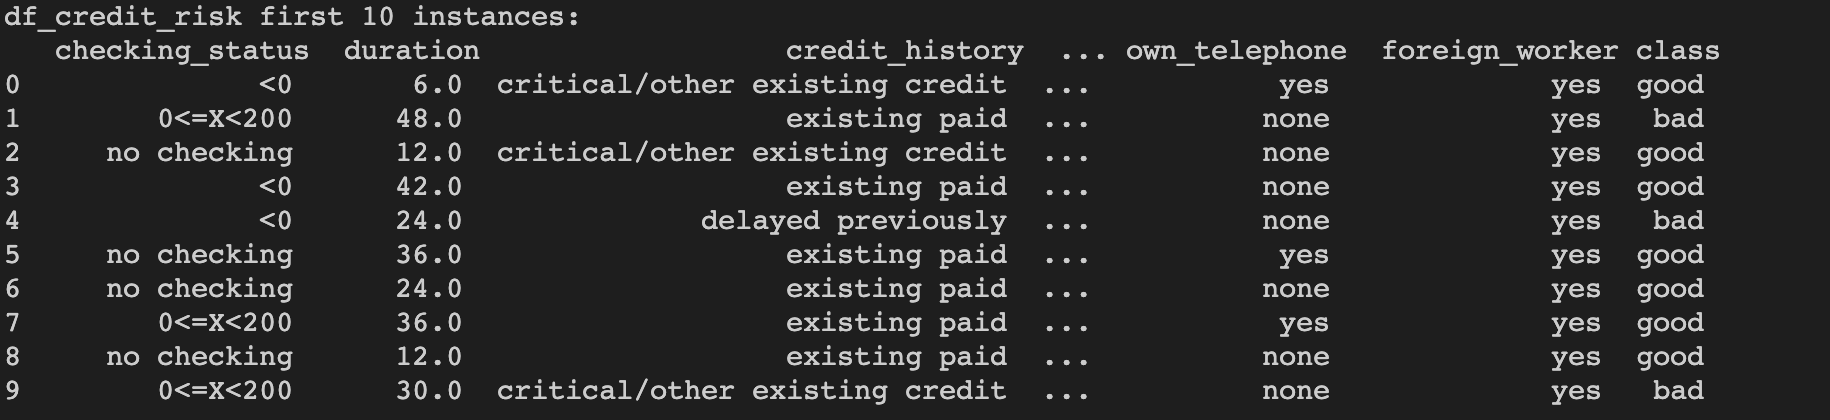
Here is where I load my chosen data andf find the mean and the standard deviation of the data, I also removed the outliers 

In [ ]:
# Identify numeric and categorical columns
numeric_cols = df_credit_risk.select_dtypes(include=[np.number]).columns
categorical_cols = df_credit_risk.select_dtypes(include=['object']).columns

# Handle missing values
for col in numeric_cols:
    df_credit_risk[col].fillna(df_credit_risk[col].mean(), inplace=True)

for col in categorical_cols:
    df_credit_risk[col].fillna(df_credit_risk[col].mode()[0], inplace=True)

# Perform label encoding for target variable and one hot encoding for other categorical variables
le = LabelEncoder()
df_credit_risk['class'] = le.fit_transform(df_credit_risk['class'])

one_hot_encoder = OneHotEncoder(drop='first')
ct = ColumnTransformer(transformers=[('encoder', one_hot_encoder, categorical_cols)], remainder='passthrough')
df_credit_risk = np.array(ct.fit_transform(df_credit_risk))

Here i found the missing and replaced them with the mean ones I also preformed one hot encoder to convert categorical variables into a numerical format that can be used for modeling.

In [ ]:
# Scatter plot for age and credit amount
plt.figure(figsize=(10, 7))
plt.scatter(df_credit_risk['age'], df_credit_risk['credit_amount'])
plt.title('Age vs Credit Amount')
plt.xlabel('Age')
plt.ylabel('Credit Amount')
plt.show()


# Bar plot for job and class
plt.figure(figsize=(10, 7))
sns.countplot(x='job', hue='class', data=df_credit_risk)
plt.title('Job vs Class')
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

# Bar plot for credit_history and class
plt.figure(figsize=(10, 7))
sns.countplot(x='credit_history', hue='class', data=df_credit_risk)
plt.title('Credit History vs Class')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

Graph 1 investigates the correlation between age and credit amount, emphasizing a concentration of individuals aged 20-40 with credit scores below 4000. Observations reveal higher credit amounts dispersed sporadically, implying these individuals may borrow more for life expenditures, potentially leading to a lower credit class. However, it's critical to understand the purpose of such borrowing, as substantial expenses like home purchases often necessitate loans, irrespective of income level. This illustrates a complex relationship between age, credit usage, and financial stability.
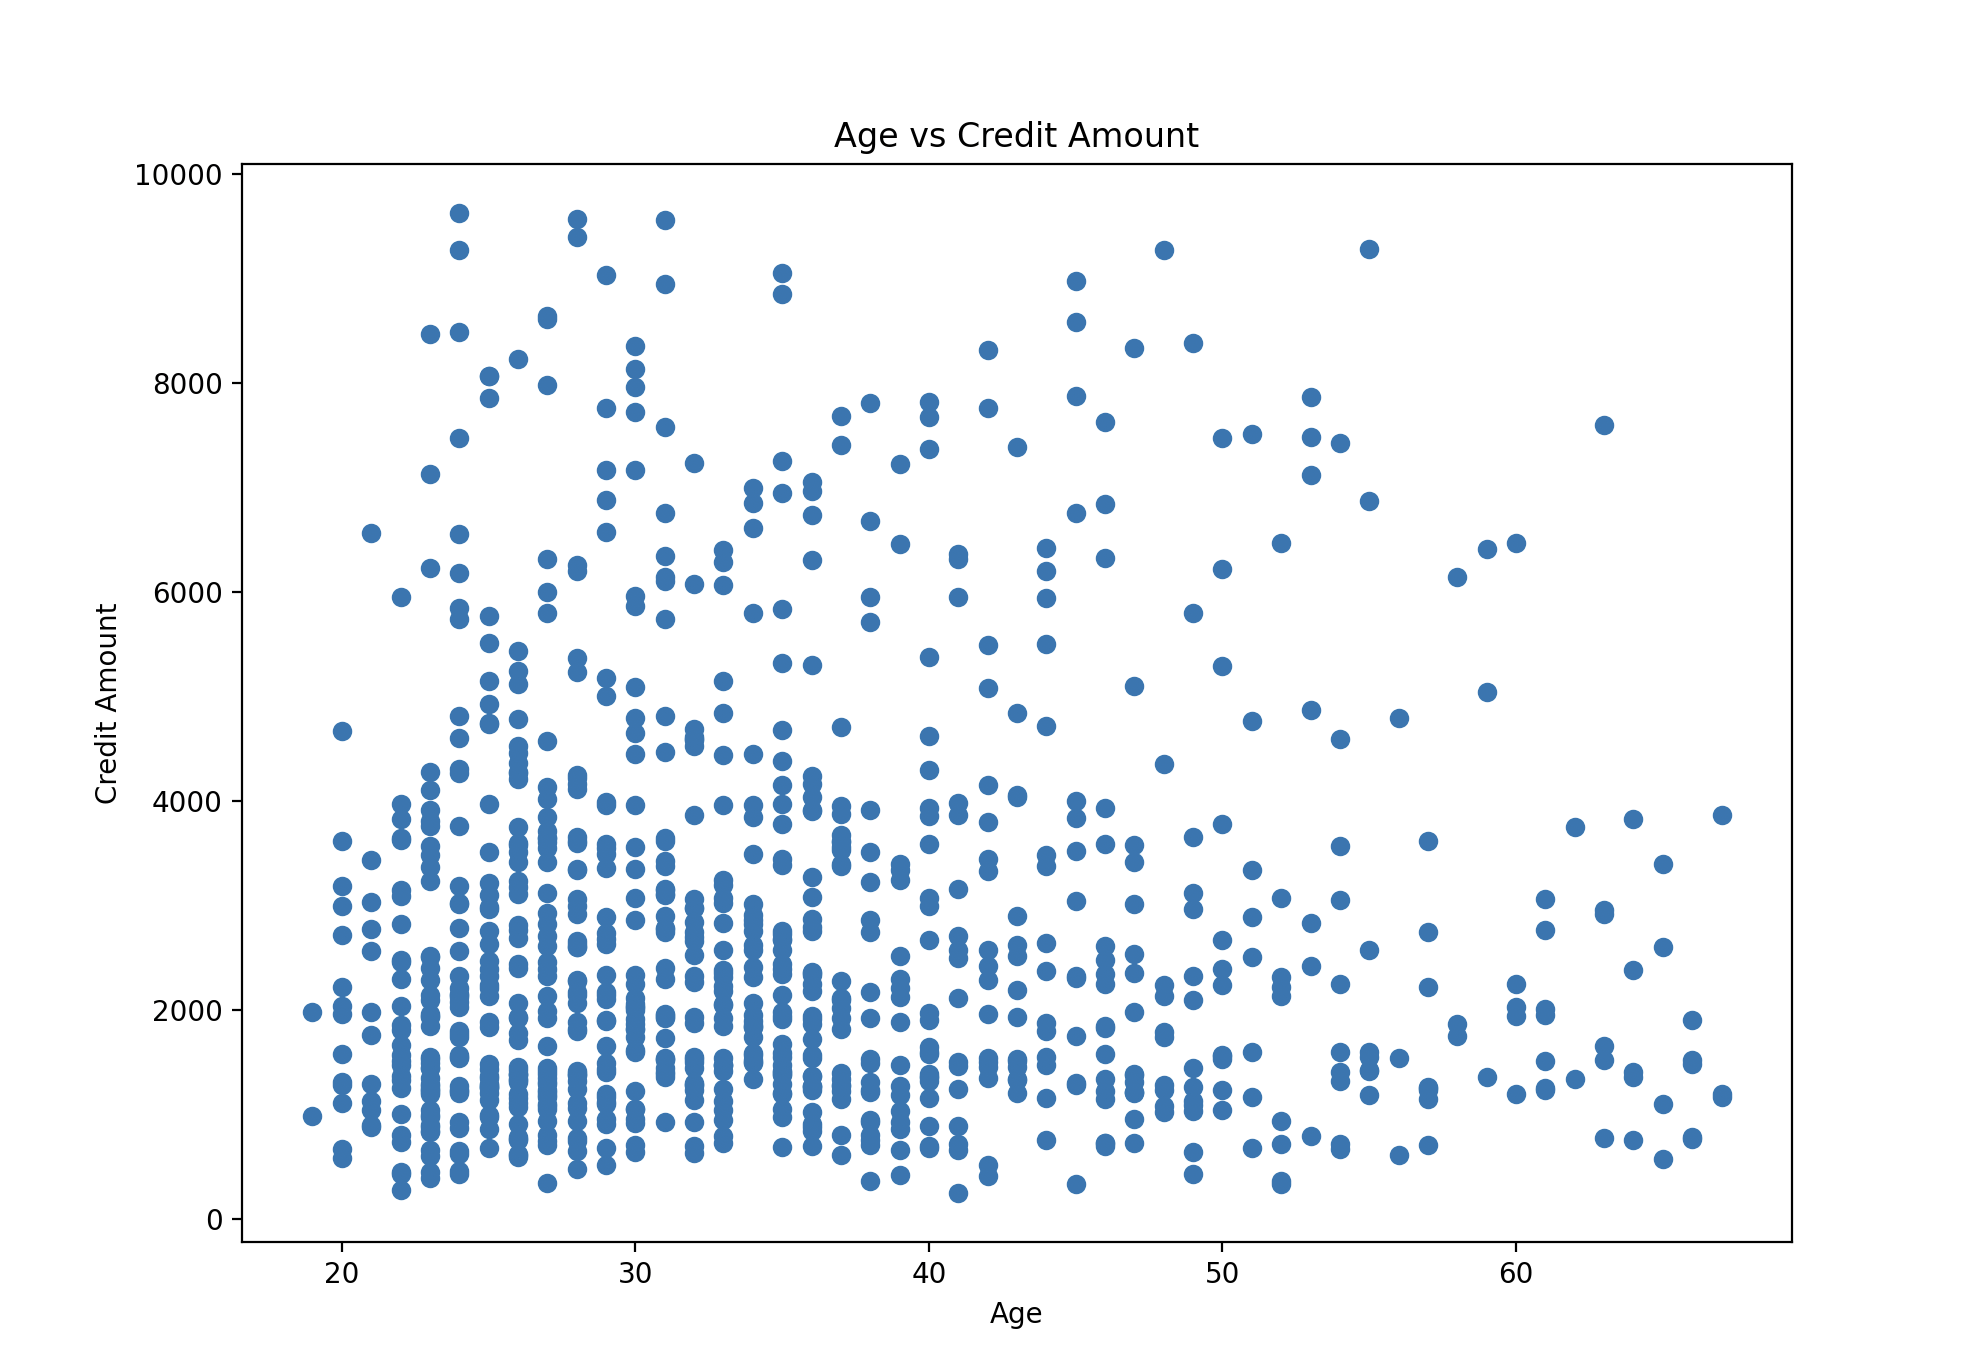
Graph 2 shows that the skill level of the workers has little to no corrorlation to the credit score. The only noticable feature is when examining the unskill workers we see that the split is far less than the others.
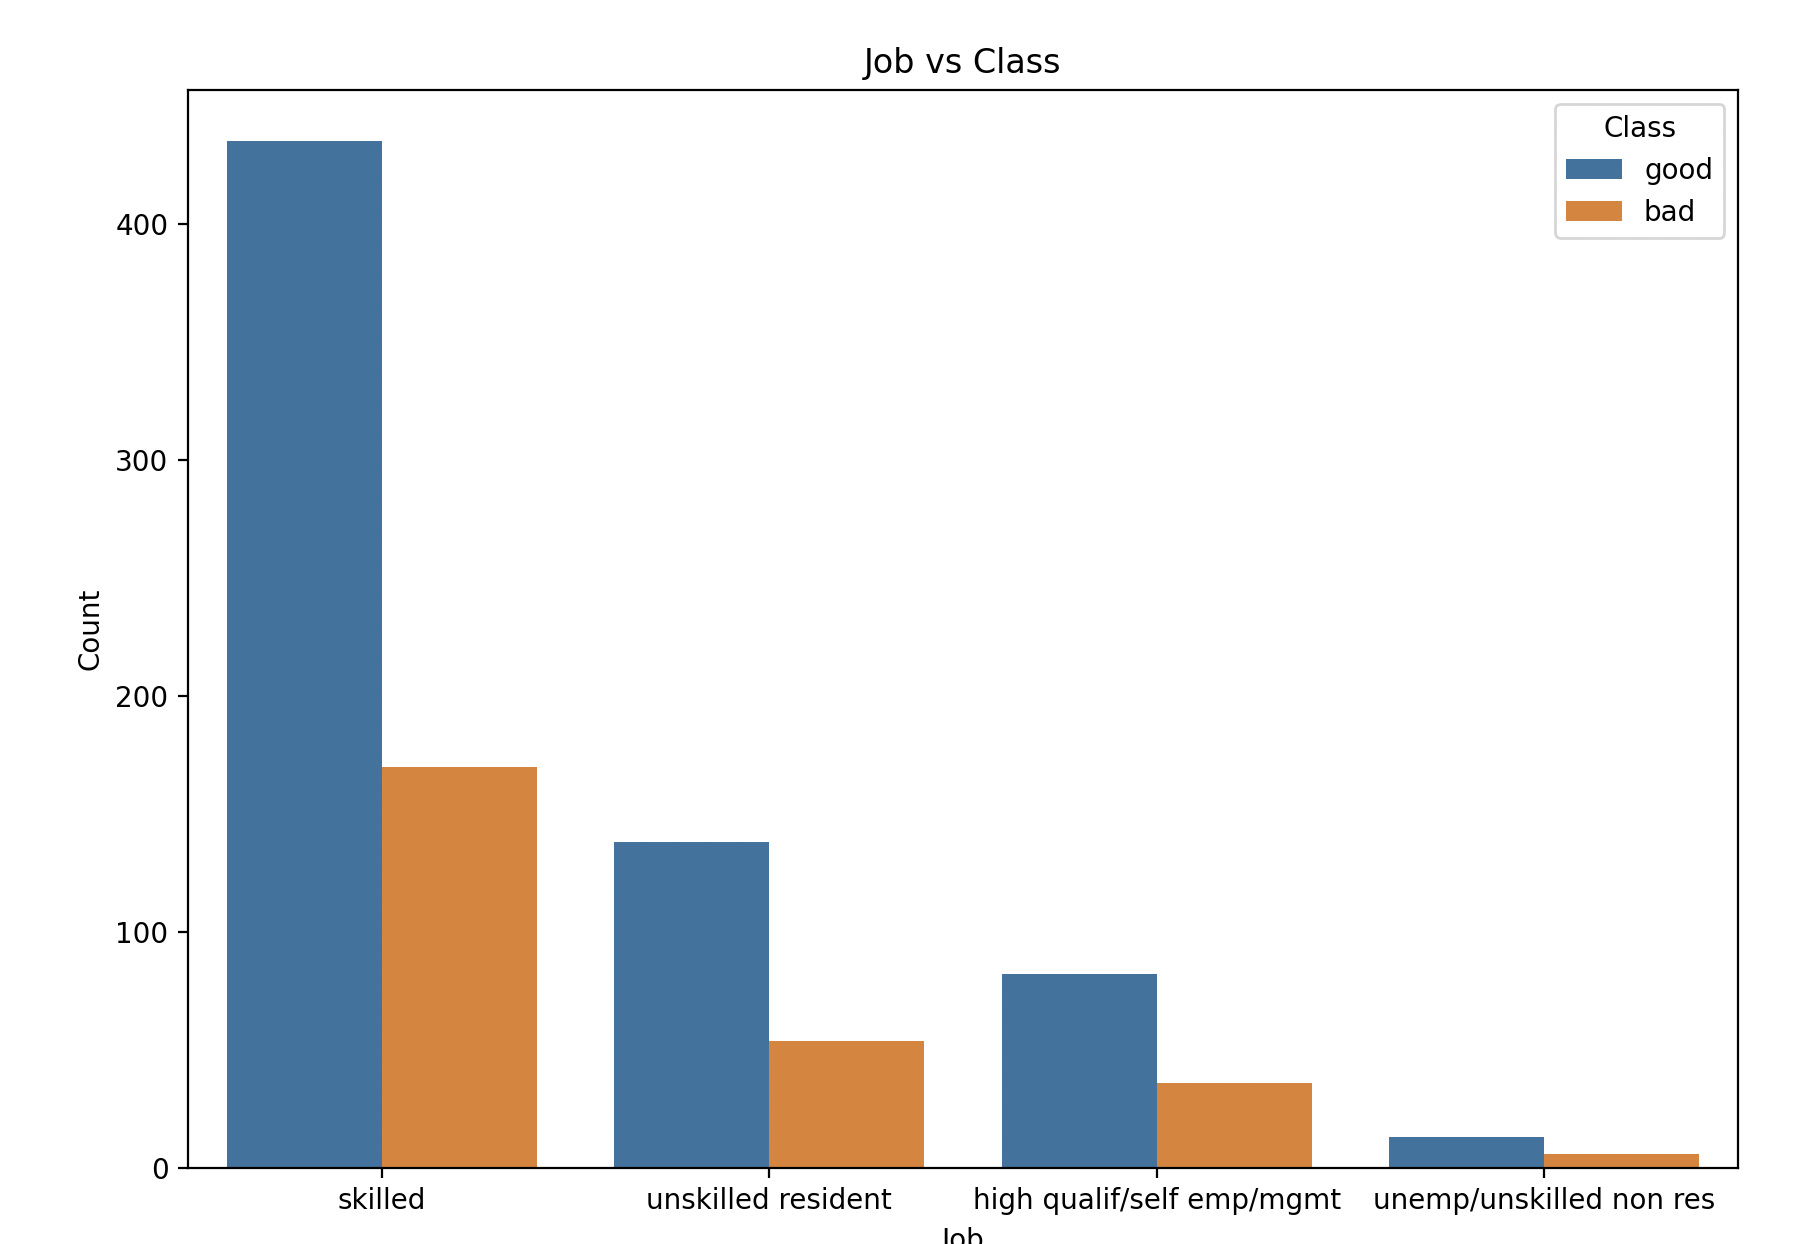
Graph 3 analyses credit history patterns, revealing that individuals with no credit or fully paid credit often have bad credit scores. In contrast, those with ongoing paid credit or multiple credit lines generally have good credit. This suggests that responsible credit management is valued over full credit repayment, indicating a consistent correlation between credit behavior and creditworthiness.
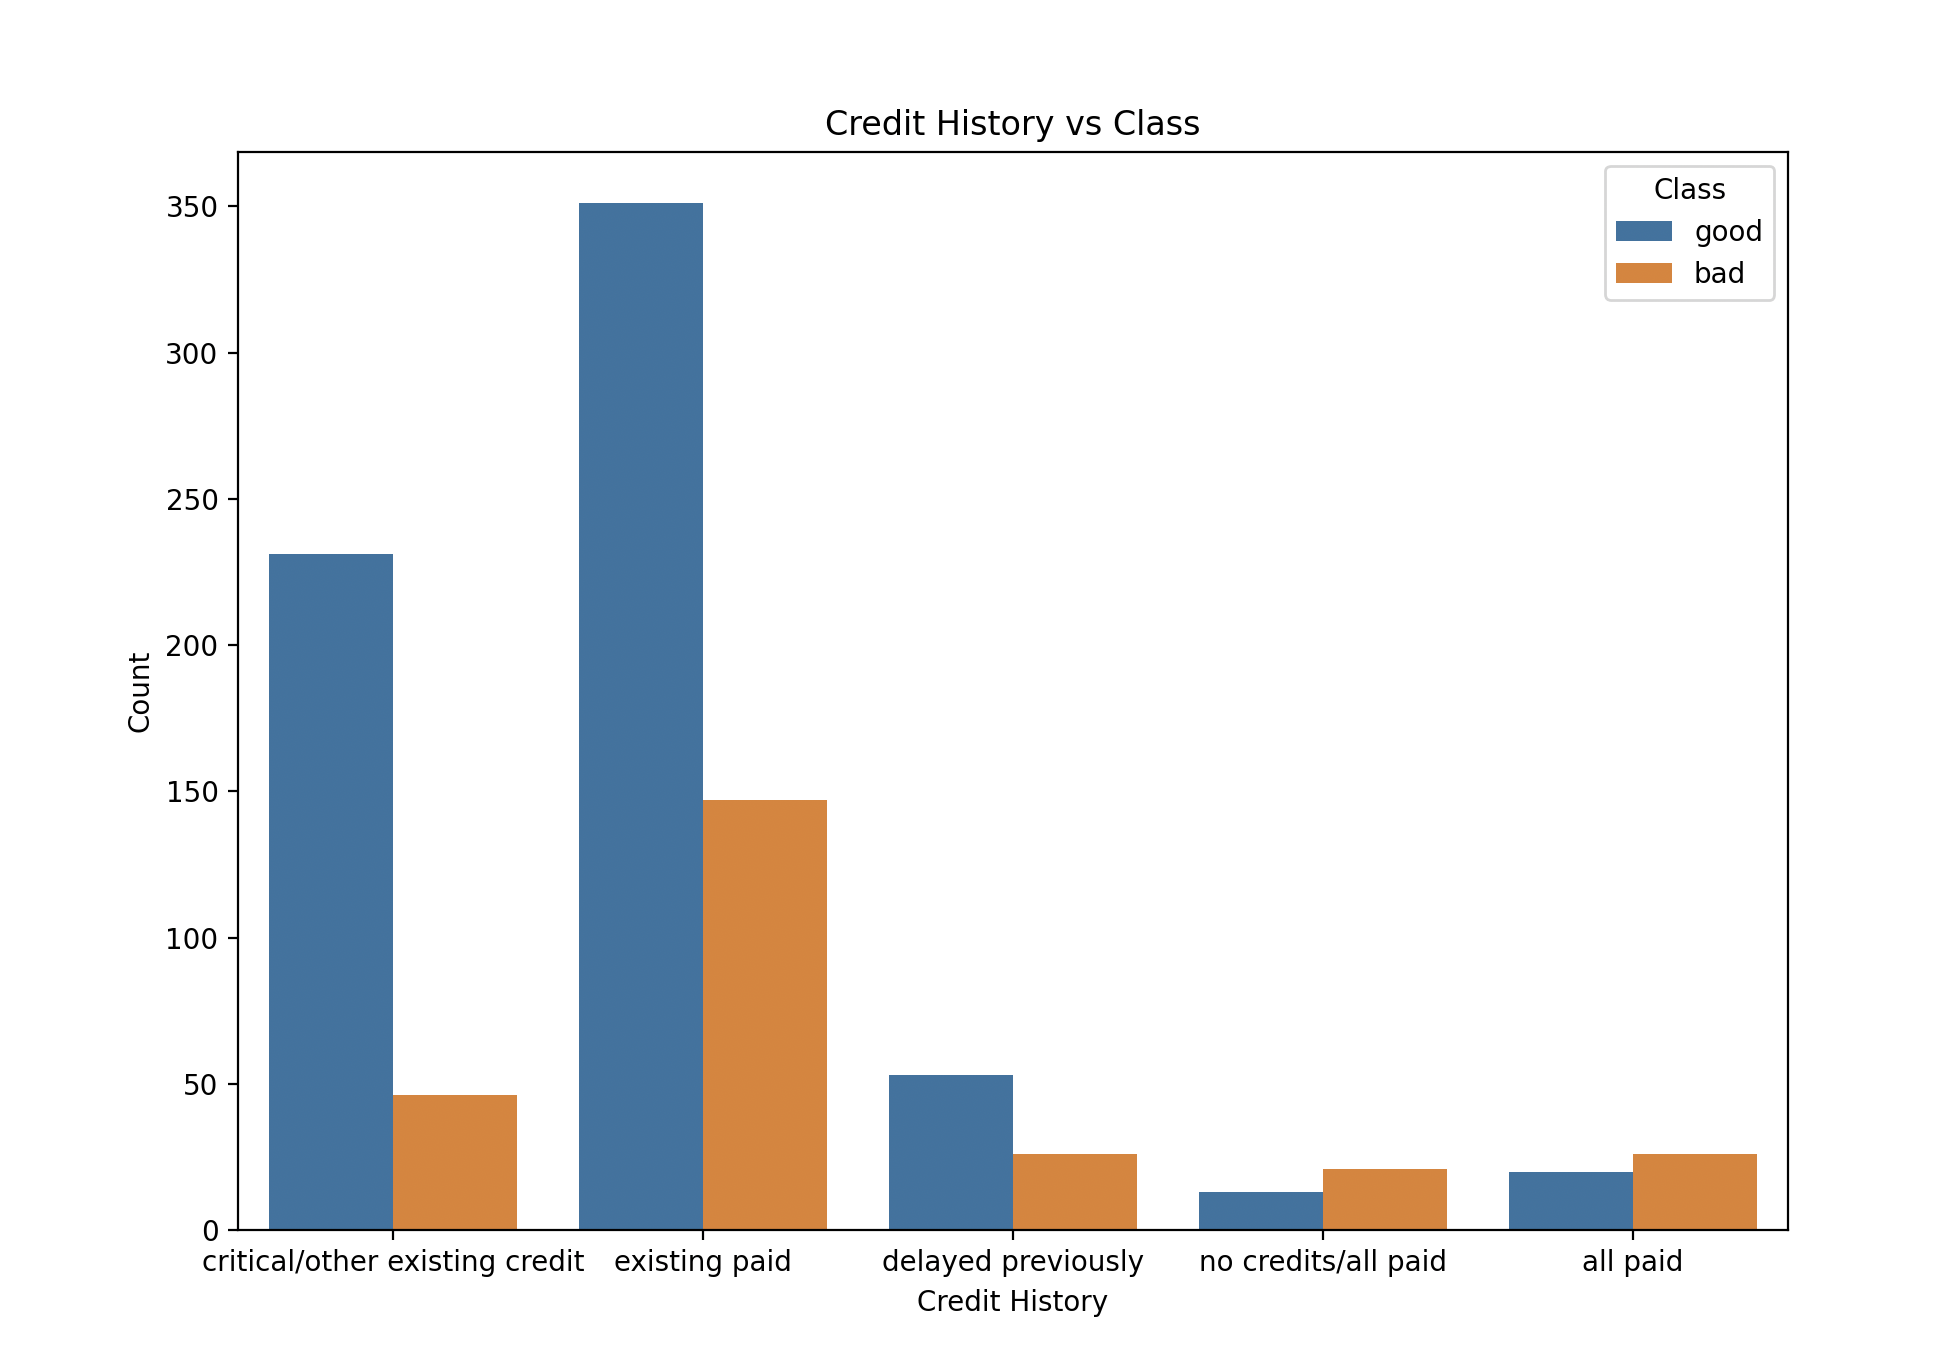



# 5 Summary:


My exploratory data analysis (EDA) and preprocessing began by loading the "credit_risk" dataset into a pandas data frame. This dataset provides valuable information about credit risk factors and the creditworthiness of individuals.
To ensure data quality and reliable results, the data cleaning process involved removing outliers from the dataset. Outliers can distort the analysis and modelling, so it was crucial to handle them appropriately.
After data cleaning, I conducted an in-depth analysis of the "age" and "credit_amount" variables. Through scatter plots and other visualisations, I uncovered a notable relationship between age and credit amount. Specifically, a significant number of individuals between 20 to 40 years old had credit scores below 4000. This observation suggests a complex interaction between age, credit usage, and financial stability, which could be significant in understanding credit risk.
Another essential aspect explored during EDA was the distribution of job classes. Using bar plots, I visualised the spread of job classes, which helped me gain insights into the different job categories present in the dataset. Understanding the job-class distribution is integral to comprehending credit risk and its connection to various occupations.
Furthermore, I analysed the relationship between credit history and creditworthiness. Through appropriate visualisations, I observed that individuals with existing or multiple credit lines tend to have better credit, indicating the value of responsible credit management in assessing credit risk.
The EDA process proved invaluable in uncovering trends and patterns that provided insights into credit risk evaluation. It highlighted the complex interplay between credit behaviour and creditworthiness, which will be vital in the subsequent steps of model training and evaluation. With a better understanding of the dataset intricacies, I am now well-equipped to build a robust credit risk prediction model that takes into account various factors to assess individuals' creditworthiness accurately.


